## Homework 3
-------

### 1. Neural Networks

#### Feed Forward Step

In [1]:
import numpy as np
from typing import List, Optional

# Input array
x : np.ndarray = np.asarray([[3, 14]]).T

# Get the number of input samples
no_samples : int = x.shape[1]

# Add an additional row of ones to represent the bias when
# multiplying the input with the first set of weights
constant : np.ndarray = np.ones((1, no_samples))

# We add the constant to the input array
# (The axis option must be added or the output array will be one dimensional)
x = np.append(x, constant, axis=0)

# Layer 1: Weights
W : np.ndarray = np.asarray([
    [ 1,  0, -1],
    [ 0,  1, -1],
    [-1,  0, -1],
    [ 0, -1, -1]
])

# Layer 2: Weights
V : np.ndarray = np.asarray([
    [ 1,  1,  1,  1, 0],
    [-1, -1, -1, -1, 2]
])

# Hidden layer activation function
relu = lambda z: np.maximum(z, 0)

# Softmax activation function
# (Add the axis to the sum to support more samples)
softmax = lambda u: np.exp(relu(u)) / np.sum(np.exp(relu(u)), axis=1)

# Layer: Hidden Layer
fz : np.ndarray = relu(np.dot(x.T, W.T))

# Add bias (A column of 1's) to hidden layer output
fz = np.append(fz.T, constant, axis=0)

# Layer: Output Layer
fu : np.ndarray = softmax(np.dot(fz.T, V.T))
print("Output:", fu)

Output: [[9.99999694e-01 3.05902227e-07]]


#### Decision Boundaries

In this problem we visualize the “decision boundaries" in $x$-space, corresponding to the four hidden units. These are the lines in $x$-space where the values of $z_1, z_2, z_3, z_4$ are exactly zero. Plot the decision boundaries of the four hidden units using the parameters of $W$ provided above.

$$
\displaystyle z_1 = x_1 W_{11} + x_2 W_{21} + W_{01}\\
\displaystyle z_2 = x_1 W_{12} + x_2 W_{22} + W_{02}\\
\displaystyle z_3 = x_1 W_{13} + x_2 W_{23} + W_{03}\\
\displaystyle z_4 = x_1 W_{13} + x_2 W_{23} + W_{03}\\
$$

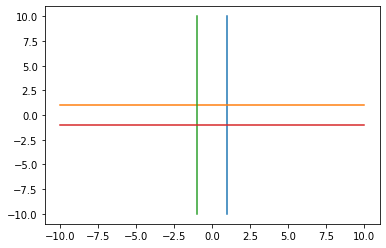

In [2]:
import matplotlib.pyplot as plt

x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)

x1_0 = (-W[0,2] - W[0,1]*x2) / W[0,0]
x2_1 = (-W[1,2] - W[1,0]*x1) / W[1,1]
x1_2 = (-W[2,2] - W[2,1]*x2) / W[2,0]
x2_3 = (-W[3,2] - W[3,0]*x1) / W[3,1]

plt.plot(x1_0, x2)
plt.plot(x1, x2_1)
plt.plot(x1_2, x2)
plt.plot(x1, x2_3)
plt.show()

#### Output of Neural Network

Using the same matrix $V$ as above, what is the value of $o_1$ (accurate to at least three decimal places if responding numerically) in the following three cases?

- Assuming that $f(z_1) + f(z_2) + f(z_3) + f(z_4) = 1$
- Assuming that $f(z_1) + f(z_2) + f(z_3) + f(z_4) = 0$
- Assuming that $f(z_1) + f(z_2) + f(z_3) + f(z_4) = 3$

**Answer**

The first row of the V matrix is just a bunch of ones with a zero at the end. That means that each of the outputs of the hidden layer will be multiplied by one and then a bias of zero will be added. This means that the logits that are fed into the first output neuron will consist of the following

$$f(z_1)*1 + f(z_2)*1 + f(z_3)*1 + f(z_4)*1 + 0$$
$$f(z_1)*-1 + f(z_2)*-1 + f(z_3)*-1 + f(z_4)*-1 + 2$$

Which basically boils down to a sum of all the outputs of the hidden layer for the first logit, and the sum of all outputs negated and with 2 added to the negated sum. Since we know the value for the sum of the hidden layer outputs for each case, we now know the different values that will be hypothetically fed into the output layer activation function (softmax)

- Case 1: Softmax([1, -1+2]) = Softmax([1, 1])
- Case 2: Softmax([0, -0+2]) = Softmax([0, 2])
- Case 3: Softmax([3, -3+2]) = Softmax([3, -1])

In [8]:
# To get the value of the first output neuron, you need to fetch
# the first value of the printed array
print("Case 1:", softmax([[1, 1]]))
print("Case 2:", softmax([[0, 2]]))
print("Case 3:", softmax([[3, -1]]))

Case 1: [[0.5 0.5]]
Case 2: [[0.11920292 0.88079708]]
Case 3: [[0.95257413 0.04742587]]


### 2. LSTM

#### LSTM States

In [15]:
# Input sequence
x : np.ndarray = np.asarray([0, 0, 1, 1, 1, 0])

# LSTM Parameters
W_fh = 0
W_ih = 0
W_oh = 0
W_fx = 0
W_ix = 100
W_ox = 100
W_ch = -100
W_cx = 50

# Biases
bf = -100
bi = 100
bo = 0
bc = 0

# Initial Conditions
h_t = 0
c_t = 0

# Sigmoid function
sigmoid = lambda x: 1 / (1 + np.exp(-x))

# LSTM Neuron Declaration
def LSTM(x, h_t, c_t):

    # Go through each time step of the input sequence
    for idx, x_t in enumerate(x):

        # Forget gate
        f_t = sigmoid(W_fh * h_t + W_fx * x_t + bf)
        
        # Input gate
        i_t = sigmoid(W_ix * h_t + W_ix * x_t + bi)

        # Output gate
        o_t = sigmoid(W_oh * h_t + W_ox * x_t + bo)

        # Memory Cell
        c_t = f_t * c_t + i_t * np.tanh(W_ch * h_t + W_cx * x_t + bc)

        # Visible State
        h_t = o_t * np.tanh(c_t)

        # We present the visible state in each timestep as a rounded
        # value that doesn't have any decimals
        print(f"Index {idx}:", np.round(h_t, 0))


# Call the LSTM function with the initial sequence
LSTM(x, h_t, c_t)

Index 0: 0.0
Index 1: 0.0
Index 2: 1.0
Index 3: -1.0
Index 4: 1.0
Index 5: -0.0


#### LSTM States 2

In [16]:
# New input sequence
x : np.ndarray = np.asarray([1, 1, 0, 1, 1])

# Initialize the memory cell and visible state
c_t = 0
h_t = 0

# Print the visible state each timestep
LSTM(x, h_t, c_t)

Index 0: 1.0
Index 1: -1.0
Index 2: 0.0
Index 3: 1.0
Index 4: -1.0


### 3. Backpropagation

#### Computing the Error